In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-gas/Nat_Gas.csv


In [2]:
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv("/kaggle/input/natural-gas/Nat_Gas.csv")
data.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [3]:
#Converting data into Dataframe
df = pd.DataFrame(data)
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


/tmp/ipykernel_18/659853906.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


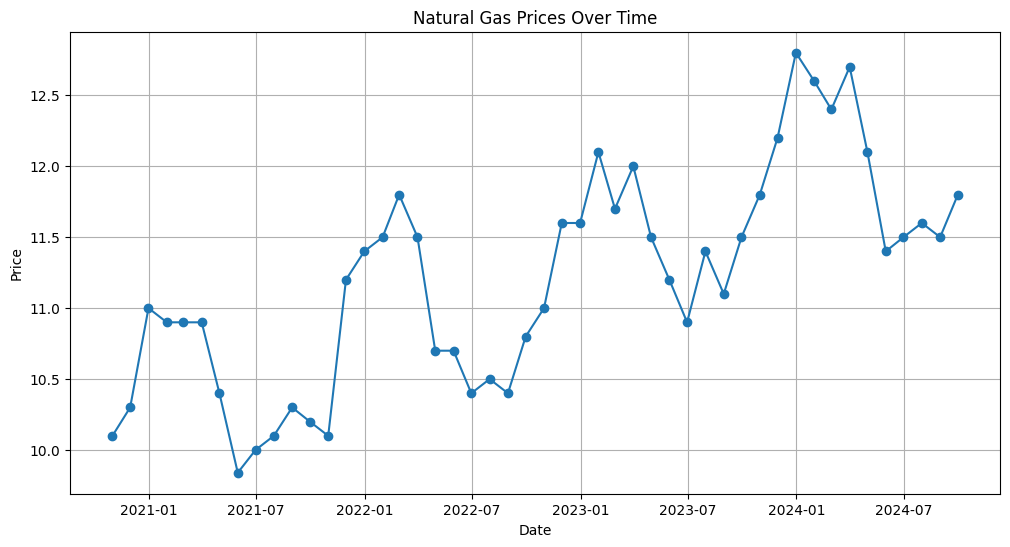

In [4]:
# Step 2: Convert the 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Step 3: Plot the natural gas prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [5]:
# Step 4: Define a function to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future
def estimate_price(date):
    nearest_date = min(df['Dates'], key=lambda x: abs(x - date))
    nearest_price = df.loc[df['Dates'] == nearest_date, 'Prices'].values[0]
    
    # Extrapolate for one year into the future
    future_date = nearest_date + pd.DateOffset(years=1)
    future_price = nearest_price + (nearest_price - df.loc[df['Dates'] == nearest_date - pd.DateOffset(years=1), 'Prices'].values[0])
    
    return nearest_price, future_price

In [6]:
# Example usage:
input_date = pd.to_datetime('2022-06-15')
price, future_price = estimate_price(input_date)
print(f"Estimated price of natural gas on {input_date.date()}: ${price:.2f}")
print(f"Estimated price of natural gas one year later: ${future_price:.2f}")

Estimated price of natural gas on 2022-06-15: $10.70
Estimated price of natural gas one year later: $11.56
